<a href="https://colab.research.google.com/github/anushka012/VGG19_model/blob/main/model_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import VGG19
from keras.applications.vgg16 import preprocess_input as pi

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize, to_categorical 

In [ ]:
num_classes = 3
image_resize_week4 = 224
batch2_size_training = 32
batch2_size_validation = 32

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X_train = np.load("/content/gdrive/MyDrive/covid_research/X_train.npy").astype(np.uint8)
Y_train = np.load("/content/gdrive/MyDrive/covid_research/Y_train.npy").astype(np.uint8)
X_test= np.load("/content/gdrive/MyDrive/covid_research/X_test.npy")
Y_test = np.load("/content/gdrive/MyDrive/covid_research/Y_test.npy")

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
print(Y_test)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
model = Sequential()
#model = tensorflow.keras.Sequential()

In [ ]:
model.add(VGG19(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
fit_history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test), batch_size=10)

Epoch 1/10
1001/1001 [==============================] - 157s 156ms/step - loss: 0.2152 - accuracy: 0.9901 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1001/1001 [==============================] - 156s 156ms/step - loss: 2.2409e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1001/1001 [==============================] - 157s 157ms/step - loss: 1.7760e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1001/1001 [==============================] - 157s 157ms/step - loss: 1.3350e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1001/1001 [==============================] - 157s 157ms/step - loss: 1.0489e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1001/1001 [==============================] - 157s 157ms/step - loss: 8.4630e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1001/1001 [==============================] - 156s 156ms/s

In [ ]:
model.save('classifier_vgg19_model.h5')

**Evaluating the model**

In [ ]:
train_loss, train_acc = model.evaluate_generator(X_train, steps=16)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
test_loss, test_acc = model.evaluate(X_test, steps=16)

16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
print("Train: %.3f, Test: %.3f" % (train_acc, test_acc))

Train: 0.000, Test: 0.000


**Plot training history**

In [ ]:
from matplotlib import pyplot as pyplot
print("Values stored in history are...\n", fit_history.history)

Values stored in history are...
 {'loss': [0.21524839103221893, 2.2408959132746986e-09, 1.7760318771209427e-09, 1.3350057725958209e-09, 1.048934161751447e-09, 8.462996969882397e-10, 6.555846976397106e-10, 5.483074549950118e-10, 4.410299625501324e-10, 3.8143135872026335e-10], 'accuracy': [0.9901009798049927, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


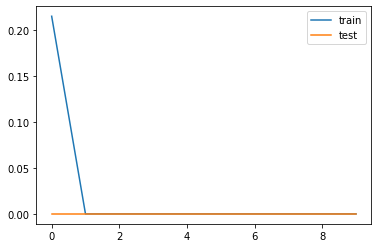

In [ ]:
plt.plot(fit_history.history['loss'], label='train')
plt.plot(fit_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
pretrained_model_2 = load_model('classifier_vgg19_model.h5')

In [ ]:
steps_per_epoch_test_2 = int(len(X_test)/ 64)

In [ ]:
score_2 = pretrained_model_2.evaluate_generator(X_test, steps=steps_per_epoch_test_2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('Accuracy of VGG19: {}% \n Error: {}'.format(score_2[1], 1 - score_2[1]))

Accuracy of VGG19: 0.0% 
 Error: 1.0


In [ ]:
import numpy as np

In [ ]:
predict2 = pretrained_model_2.predict_generator(X_test, steps=steps_per_epoch_test_2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
class_names= ['0', '1', '2']

In [ ]:
label2index = {0:0, 1:1, 2:2}

In [ ]:
list_of_label = list(label2index.keys())
print("The list of classes: ", list_of_label)

The list of classes:  [0, 1, 2]


In [ ]:
print("VGG19 Predictions :")
for i in range(0, 10):
    pred_class = np.argmax(predict2[i])
    pred_label = list_of_label[pred_class]
    print('Prediction :{}'.format(
        pred_label,
        predict2[i][pred_class]))
    # img = Image.open(predict2[i])
    # img.show()

VGG19 Predictions :
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
